# Introduction to Simple Linear Regression

- Simple linear regression is a statistical method used to model the relationship between a single independent variable (predictor variable) and a dependent variable (response variable) by fitting a linear equation to observed data. It's called "simple" because it deals with only one independent variable.

## Basic Concept

- Basic Concept
In simple linear regression, we assume that the relationship between the independent variable $X$ and the dependent variable $Y$ can be described by a linear equation: $Y = \beta_0 + \beta_1 \cdotp X + \epsilon $

- Y is the dependent variable (the variable we are trying to predict or explain).

- X is the independent variable (the variable we are using to make predictions).

- $\beta_0$ is the intercept, which represents the value of $Y$ when $X=0$.

- $\beta_1$ is the slope, which represents the change in $Y$ for a one-unit change in $X$.

- $\epsilon$ is the error term, which represents the difference between the observed value of $Y$ and the value predicted by the linear equation, $\hat{Y}$.

## Key Assumptions
- Linearity: The relationship between $X$ and $Y$ is linear.

- Independence: Observations are independent of each other.

- Homoscedasticity: The variance of the error terms is constant across all levels of $X$.

- Normality: The error terms are normally distributed.

- No Perfect Multicollinearity: The independent variable is not a perfect linear function of other independent variables.

## Limitations

- Simple linear regression assumes a linear relationship between variables, which may not hold true in all cases.

- It is sensitive to outliers and influential points.

- It may not capture complex relationships between variables.


## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

## Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/erkansirin78/datasets/master/Advertising.csv")

In [3]:
df

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df["TOTAL_SPEND"] = df.TV + df.Radio + df.Newspaper

**Is there a relationship between *Total Spend* advertising spend and *Sales*?**

<Axes: xlabel='TOTAL_SPEND', ylabel='Sales'>

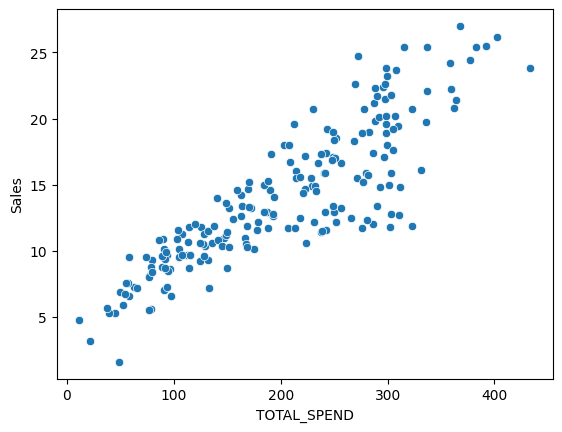

In [6]:
sns.scatterplot(x='TOTAL_SPEND',y='Sales',data=df)

## Least Squares Line

Full formulas available on Wikipedia: https://en.wikipedia.org/wiki/Linear_regression ,as well as in ISLR reading.

<Axes: xlabel='TOTAL_SPEND', ylabel='Sales'>

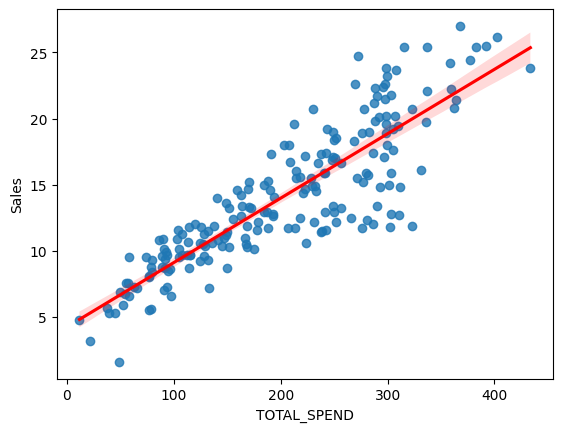

In [7]:
# Basically, we want to figure out how to create this line
sns.regplot(
    x='TOTAL_SPEND',
    y='Sales',
    data=df,
    line_kws={"color": "red"}  # Change regression line color
)

Let's go ahead and start solving: $y=mx+b$

Simply solve for m and b, remember, that as shown in the video, we are solving in a generalized form:
\begin{equation}
\hat{y} = \beta_0 + \beta_1 \textbf{X}
\end{equation}

- $y$ is a vector of sales while $\textbf{X}$ is a vector of total_spend. The goal is to solve for the $\beta$ coefficients.

- $\hat{y}$ is the predicted value.

- $y$ is the true value.

In [8]:
X = df['TOTAL_SPEND']
y = df['Sales']

# Using Statsmodels
---

In [9]:
import statsmodels.api as sm
X = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           5.06e-62
Time:                        03:42:30   Log-Likelihood:                -473.88
No. Observations:                 200   AIC:                             951.8
Df Residuals:                     198   BIC:                             958.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.2430      0.439      9.676      0.000       3.378       5.108
TOTAL_SPEND     0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                         528.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# New x values
new_x = pd.DataFrame({'x': [6, 7, 8]})
new_X = sm.add_constant(new_x)  # Add intercept

# Predict
new_predictions = model.predict(new_X)
print(new_predictions)

0    4.535155
1    4.583843
2    4.632531
dtype: float64


# Using Numpy Function Polyfit
---

In [16]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [17]:
# Returns highest order coef first!
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

In [18]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)

In [19]:
predicted_sales =  0.04868788*potential_spend + 4.24302822

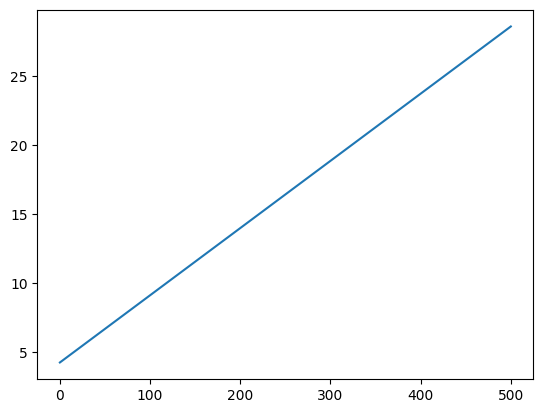

In [20]:
plt.plot(potential_spend,predicted_sales)

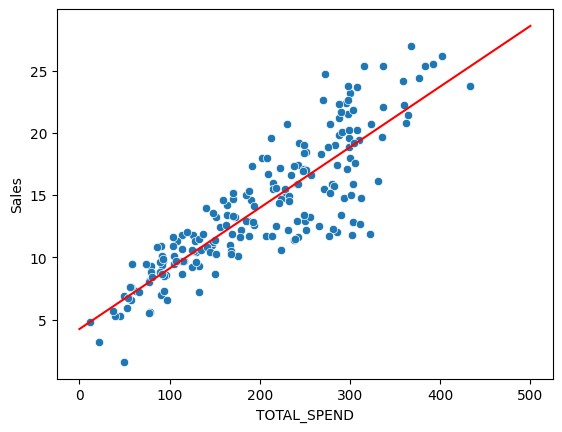

In [21]:
sns.scatterplot(x='TOTAL_SPEND',y='Sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

**Our next ad campaign will have a total spend of $500, how many units do we expect to sell as a result of this?**

In [22]:
spend = 500
predicted_sales =  0.04868788*spend + 4.24302822

In [23]:
predicted_sales

28.58696822

## Overfitting, Underfitting, and Measuring Performance

Notice we fit to order=1 , essentially a straight line, we can begin to explore higher orders, but does higher order mean an overall better fit? Is it possible to fit too much? Too little? How would we know and how do we even define a good fit?

In [37]:
np.polyfit(X,y,4)

array([-1.32539028e-09,  1.46034814e-06, -5.23540362e-04,  1.18664227e-01,
        1.51379069e+00])

In [34]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)

In [38]:
predicted_sales =   -1.32539028e-09*potential_spend**4 + 1.46034814e-06*potential_spend**3 + -5.23540362e-04*potential_spend**2 + 1.18664227e-01*potential_spend**1 + 1.51379069e+00

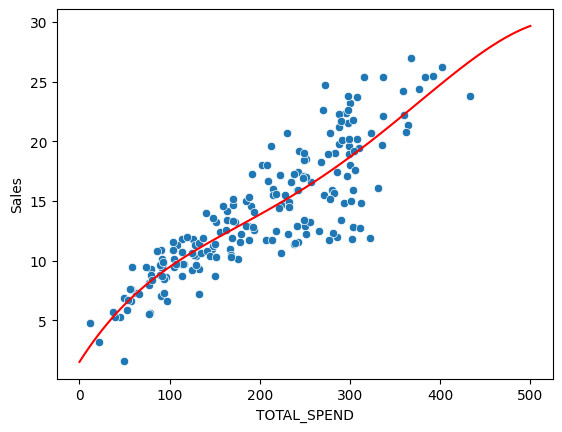

In [39]:
sns.scatterplot(x='TOTAL_SPEND',y='Sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

-------
--------